# Titanic - Machine Learning from Disaster - agodwinp

These is my ideas around investigating the Titanic dataset using Machine Learning

First, I redefine the problem statement and attempt to critically analyse the question at hand. Then I will gain some context and understanding to the problem, by taking a closer look at the features.

### *Problem Statement*

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Survival rate = 32%.

The aim of this exercise is to use Machine Learning to correctly predict the greatest percentage of observations from the test sample. I will train a model using the 'train' dataset, listing passengers who survived and did not survive the disaster. This trained model will then be put to the test against an unseen test sample called 'test'.

As with all exercises of this nature, understanding of the event and context is key. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Throughout this analysis I will aim to extrapolate more statistically relevant information like this. Enjoy!

### Importing Packages

Now I will load the relevant packages. Pandas is used for data manipulation and to allow us to acquire our data into Pandas DataFrames. NumPy is used for mathematical programming and use of large arrays and matrices. 

Seaborn and MatPlotLib are used for visualisations.

In [127]:
# Packages for data manipulation and computation 

import pandas as pd
import numpy as np

# Packages for visualisation

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

### Acquiring the Data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [128]:
raw_train = pd.read_csv('C:/Users/I308570/Kaggle/Titanic - Machine Learning from Disaster/Data/train.csv')
raw_test = pd.read_csv('C:/Users/I308570/Kaggle/Titanic - Machine Learning from Disaster/Data/test.csv')

full = train.append(test, ignore_index=True)
del raw_train, raw_test

train = full[:892]

print('Datasets \nfull: ', full.shape, '\ntrain: ', train.shape)


Datasets 
full:  (1310, 12) 
train:  (892, 12)


Now that the data is ready in DataFrames, let's take a look at it.

In [129]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


For further understanding, below are the descriptions for each of the features:

### Variable Descriptions

1. Age = age of passenger in years
2. Cabin = cabin number
3. Embarked = port of embarkation ( C = Cherbourg, Q = Queenstown, S = Southampton )
4. Fare = passenger fare
5. Name = name of passenger
6. Parch = number of parents/children aboard
7. PassengerId = ID column, one unique ID per passenger
8. Pclass = ticket class
9. Sex = gender
10. Sibsp = number of siblings/spouses aboard
11. Survived = did the passenger survive? ( 1 = survived, 0 = did not survive )
12. Ticket = ticket number

#### *Variable Notes*

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

### Analysing the features

With this context, let's understand the representations of these columns. This can help to guide us as we move forward.

In [130]:
print(full.columns.values)

['Age' 'Cabin' 'Embarked' 'Fare' 'Name' 'Parch' 'PassengerId' 'Pclass'
 'Sex' 'SibSp' 'Survived' 'Ticket']


It is important to understand which features have missing values, so that we can handle these missing values or decide whether to exclude these features.

Age            177
Cabin          688
Embarked         2
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         1
Ticket           0
dtype: int64


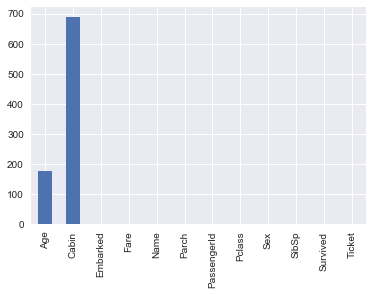

In [131]:
train.isnull().sum().plot(kind='bar')
print(train.isnull().sum())

From this, we can see that Cabin and Age have a significant number of missing values. The decision now must be made to replace these with a value, or to exclude this feature completely.

To continue our analysis, let's look at the datatypes for each of the features.

In [132]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
Age            715 non-null float64
Cabin          204 non-null object
Embarked       890 non-null object
Fare           892 non-null float64
Name           892 non-null object
Parch          892 non-null int64
PassengerId    892 non-null int64
Pclass         892 non-null int64
Sex            892 non-null object
SibSp          892 non-null int64
Survived       891 non-null float64
Ticket         892 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-nu

We can see that for the training sample, we have 3 floating numbers, 4 integers and 5 categorical variables. The only difference for the test sample is that the survived column is missing, which is intended.

In [133]:
train.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,715.000000,892.000000,892.000000,892.000000,892.000000,892.000000,891.000000
mean,29.705832,32.176882,0.381166,446.500000,2.309417,0.522422,0.383838
std,14.517431,49.672240,0.805706,257.642517,0.835923,1.102264,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.250000,7.895800,0.000000,223.750000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.500000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,669.250000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,892.000000,3.000000,8.000000,1.000000


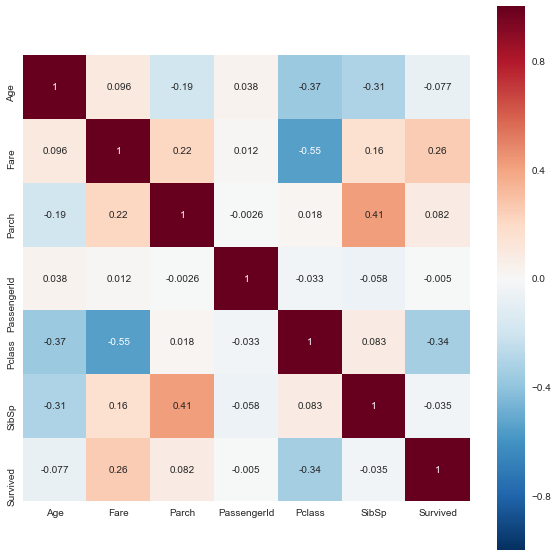

In [158]:
corr = train.corr()
fig, ax = plt.subplots(figsize =(10, 10))
    
corr_plot = sns.heatmap(corr, annot=True, square = True, ax = ax)

ValueError: could not convert string to float: 'W./C. 6607'

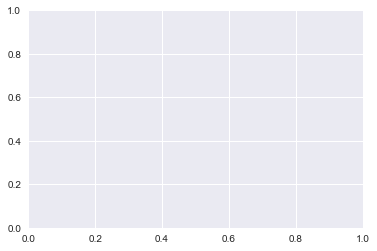

In [161]:
distr = sns.distplot()